<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_26_multiclase/class_26_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Modelo de clasificasión para predecir si un pasajero de la nave espacial Titanic, fue transportado a una dimención alternativa. 

### CONTEXTO

El siguiente dataset, es un ejercicio abierto de Kaggle donde si simula siguiente situación:

"En el año 2912, se necesitan habilidades de ciencia de datos para resolver un misterio cósmico. 

Se ha recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. 

Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. 

Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. 

Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, se debe predecir el porcentaje de pasajeros que fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial. "

## 1. Plantear la pregunta.  

Tenemos un dataset $[X \mid y]$ con las siguientes condiciones:

- $X[x_{ij}] \in \mathbb{R}_{n,d}$.

- $X^{j}$, Donde $j$ representa el j_ésimo atributo.

- $X_{i}$, Donde i representa la i-ésima fila o instancia.

- $x_{ij}$, $ij$-ésima  entrada de la matriz X.

- $y$ = $[y_{i}] \in \mathbb{R}^{n}$: Vector cuya i-esima entrada indica si el i-esimo  pasajero fue o no transportado a otra dimensión.

-  $y_{i}$ es $1$ si, el i-esimo pasajero fue tranportado a otra galaxia y $0$ si no lo fue.

El problema que se va tratar, es un problema de clasificación binaria, dado que el objetivo es predecir a partir de los datos si el pasajero fue transportado a otra dimensión o no, es decir $h$ tiene la forma:


$h_{w}(X_{i})$ = $ y_{i}$

## 2. Exploración inicial.

- Los datos fueron tomados del sitio web Kaggle y son de carácter público. 

- El objetivo con este dataset es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. 

Los datos hacen parte de un conjunto de registros personales recuperados del sistema informático dañado de la nave.

- La función objetivo esta dada por
$$
h:  R^{13} ⟶ \{0,1\}  \\
   \hspace{1,5cm}  h(X_{m\times n}) = y
$$ 

donde $X$ es una matriz con un número de filas mucho mayor al número de columnas, además $y$ es un vector de $R^{m}$ cuyas entradas toman valores  $1$ o $0$ las cuales indican que el pasajero fue transportado o no a otra dimension  respectivamente.

A continuación se describen cada una de las variables que conforman el conjunto de datos.


* `train.csv`: conjunto de aproximadamente 8700 datos de los pasajeros de la nave titanic, los cuales seran utilizados para el entrenamiento 

* `PassengerId`: Es un Id único que identifica a cada pasajero. El cual tiene la forma $gggg\_pp$ donde $gggg$ indica un grupo con el que viaja el pasajero y $pp$ es su número dentro del grupo.
* `HomePlanet`: El planeta del que partió el pasajero (Earth, Europa,
Mars).
* `CryoSleep`: Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje.
- `Cabin`: El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde side puede ser P por Port o S por Estribor .(El Port y el Starboard son términos náuticos que refieren a los lados izquierdo y derecho, respectivamente, de una nave, según lo percibido por una persona a bordo que hace frente al la nave.)
* `Destination`: El planeta al que los pasajeros pretendian llegar.
* `Age`: La edad del pasajero.
* `VIP`: Si el pasajero ha pagado por servicio VIP especial durante el viaje.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.
* `Name`: Nombre y apellido del pasajero.
* `Transported`: Dice si  el pasajero fue transportado a otra dimensión. Esta es nuestra variable objetivo.



# Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

# Obtener los datos 

In [2]:
datos = pd.read_csv("train_vallejo_cano.csv")

In [3]:
datos.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [4]:
datos.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
datos.shape

(8693, 14)

In [6]:
len(datos.Cabin.value_counts()) 

6560

Dataset con $8693$ instancias y $14$ , $13$ son variables predictoras y $1$ respuesta.

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Se convierte la variable respuesta `Transported` de tipo boleano a tipo entero, donde   

* 1(True) indica que el pasajero fue transportado a otra dimensión y   
* 0 (False) que no lo fue.  


In [8]:
datos['Transported'] = datos['Transported'].astype(np.int64)

Se evidencia que hay presencia de datos faltantes, por tanto, es necesario hacer una imputación a las variables para obtener dichos datos

In [ ]:
datos.head()

Ahora, se suprimen las variables `PassengerId`, `cabin` y `name` dado que  son etiquetas y no son necesarias para el objetivo de nuestro estudio.

In [9]:
datos = datos.drop(['PassengerId','Cabin','Name'],axis=1)

# Análisis exploratorio de las variables categóricas para poder identificar sus niveles

In [10]:
datos['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

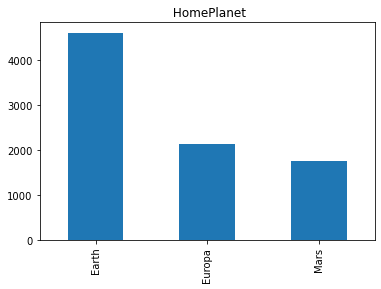

In [11]:
datos['HomePlanet'].value_counts().plot(kind='bar',
                                            title=' HomePlanet')
plt.show()

De lo anterior podemos concluir que aproximadamente el $54\%$ son de Earth, $25\%$ son de Europa y $21\%$ son de Mars.

In [12]:
datos['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

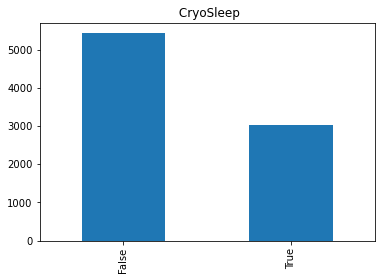

In [13]:
datos['CryoSleep'].value_counts().plot(kind='bar',
                                            title=' CryoSleep')
plt.show()

Es decir, que solamente aproximadamente él $36\%$ de los pasajeros decidieron ser puestos en animación suspendida durante el viaje.

In [14]:
datos['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

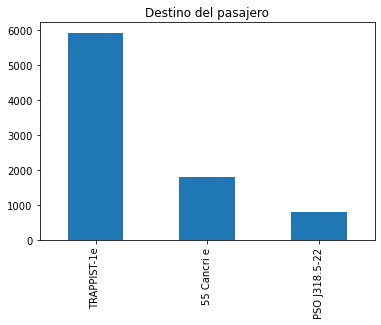

In [15]:
datos['Destination'].value_counts().plot(kind='bar',
                                            title='Destino del pasajero')
plt.savefig('destino.jpg')
plt.show()

De donde podemos ver que,   

* el principal destino de los pasajeros es el planeta TRAPPIST-1e en un $69\%$,   
* mientras que el segundo destino con más pasajeros es 55 Cancri e con un $21\%$ y   
* por último está PSO J318.5-22 con apenas un $10\%$ de los pasajeros.

In [16]:
datos['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

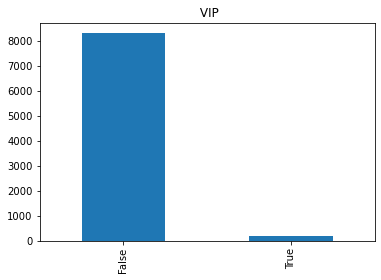

In [17]:
datos['VIP'].value_counts().plot(kind='bar',
                                            title=' VIP')
plt.show()

En este caso podemos ver que la gran mayoría ($97\%$) de pasajeros decidieron no pagar por el servicio VIP.

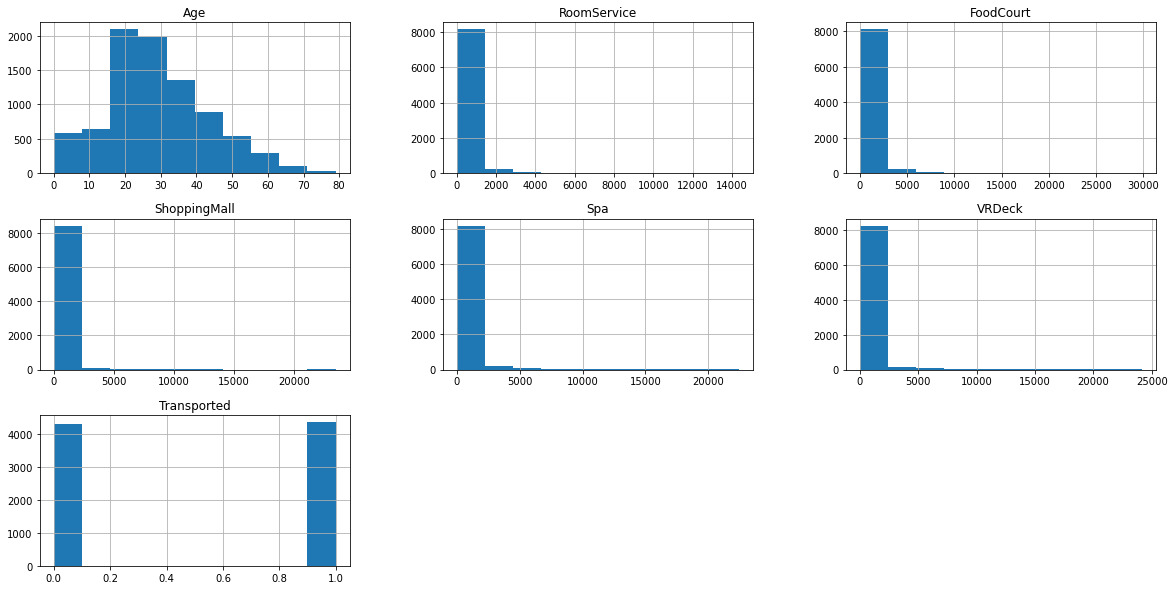

In [18]:
datos.hist(figsize = (20,10))
plt.show() 

De las gráficas se puede ver, que la edad de la gran mayoría de los pasajeros se encuentra entre $25$ y $30$ años. 

Mientras que las variables que provienen de servicios de lujo brindados por la nave se comportan casi todos de manera similar, donde se puede observar que la mayoría de las personas gastaron muy poco dinero en estos servicios, lo cual tiene sentido, pues como se vió en la gráfica de `VIP`, solamente él $3\%$ de las personas pagaron ese servicio.

A continuación, se verá un análisis exploratorio para las variables numéricas

In [19]:
datos.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [ ]:
datos.corr()

In [ ]:
datos.corr().Transported.sort_values(ascending= False)

Note que hay correlación negativa (la más alta) entre la variable de respuesta `Transported` y las variables de servicios de lujo.

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
len(datos)

In [ ]:
atributos = ['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
scatter_matrix(datos[atributos],figsize=(14,10))
plt.show()

###  3) Preparar los datos para los algoritmos de aprendizaje.

In [20]:
from sklearn.model_selection import  train_test_split
train_set, test_set = train_test_split(datos, test_size = 0.2, random_state=42)

In [21]:
train_set.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
2333,Earth,False,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,0
2589,Earth,False,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,0


In [22]:
test_set.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
304,Mars,False,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,1
2697,Earth,False,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,0


# Tratar datos faltantes

## Pipeline

Se crea un pipeline que ayude a automatizar futuros proyectos similares

In [23]:
# Preprocesamiento de variables numéricos.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 

# Preprocesamiento de atributos categíricos 
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline 

from sklearn.compose import ColumnTransformer


# División en predictores y etiquetas 


In [24]:
train_set_predictores = train_set.drop('Transported', axis=1)
test_set_predictores = test_set.drop('Transported', axis=1)

In [25]:
train_set_labels = train_set['Transported']
test_set_labels = test_set['Transported']

In [26]:
Pipeline_num = Pipeline([
     ('imputar', SimpleImputer(strategy = 'median')),
     ('estandarizar', StandardScaler())                    
      ])

In [27]:
Pipeline_cat = Pipeline([
     ('imputar', SimpleImputer(strategy='most_frequent')),
     ('Codificar', OneHotEncoder())                    
      ])

Note que `fill_value` no lo requería especificar a menos que `strategy` se estableciera en `constant`. 


In [28]:
datos_num_train = train_set_predictores.drop(['HomePlanet','CryoSleep','Destination','VIP'],axis=1)
datos_cat_train = train_set_predictores.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', \
                                        'Spa', 'VRDeck'],axis=1)

In [29]:
lista_atrib_num = list(datos_num_train.columns)
lista_atrib_cat = ['HomePlanet','CryoSleep','Destination','VIP']

In [30]:
 transformador_completo = ColumnTransformer([
                                            ('num', Pipeline_num, lista_atrib_num),
                                            ('cat', Pipeline_cat, lista_atrib_cat),
])

In [31]:
X_prep_train = transformador_completo.fit_transform(train_set_predictores)
X_prep_test = transformador_completo.transform(test_set_predictores)

### 4) Propuestas de modelos

- SGD Classifier 

Le recomiendo siempre justificar el modelo que implemente para la selección de modelos. 

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
sgd_clf = SGDClassifier(random_state=42) 

In [34]:
sgd_clf.fit(X_prep_train, train_set_labels) 

SGDClassifier(random_state=42)

## Medida de desempeño con validación cruzada con 10 hojas de validación

In [35]:
from sklearn.model_selection import cross_val_score 

In [36]:
puntajes_sgd = cross_val_score(sgd_clf, X_prep_train, train_set_labels, \
                           cv = 10, scoring = 'accuracy')

In [37]:
def mostrar_puntajes(puntajes):
    print(puntajes)
    print(puntajes.mean())
    print(puntajes.std())

In [38]:
mostrar_puntajes(puntajes_sgd)

[0.77873563 0.76436782 0.79310345 0.81034483 0.78273381 0.76690647
 0.78992806 0.77553957 0.79568345 0.8       ]
0.7857343091044406
0.013974964494700322


## Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_clf = LogisticRegression()

In [42]:
lr_clf_ = lr_clf.fit(X_prep_train, train_set_labels) 

In [43]:
puntajes_lr = cross_val_score(lr_clf, X_prep_train, train_set_labels, \
                           cv = 10, scoring = 'accuracy')

mostrar_puntajes(puntajes_lr)

[0.77586207 0.78591954 0.78304598 0.80747126 0.8        0.77985612
 0.79568345 0.76834532 0.7971223  0.8028777 ]
0.7896183742661044
0.01220395719929589


## Random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest_clf = RandomForestClassifier(random_state=42 )

In [46]:
forest_clf.fit(X_prep_train, train_set_labels) 

RandomForestClassifier(random_state=42)

In [47]:
%%time 
puntajes_forest = cross_val_score(forest_clf, X_prep_train, train_set_labels, \
                           cv = 10, scoring = 'accuracy')

mostrar_puntajes(puntajes_forest)

[0.79166667 0.77729885 0.78591954 0.78591954 0.77985612 0.77266187
 0.7971223  0.77841727 0.78705036 0.79856115]
0.785447366244935
0.008127252110492877


### 5. Afinar el modelo

In [48]:
from sklearn.model_selection import GridSearchCV

# Afinamiento de Random Forest Classifier

In [49]:
param_grid = [
    {'n_estimators':[3,10,30,40,50, 60, 70], 'max_features':[2,4,6,8,10, 12, 14],\
     'max_depth':[1,2,3,4,5,6, 7]},
    {'bootstrap': [False],'n_estimators':[3,10]}
]

In [50]:
rejilla = GridSearchCV(forest_clf, param_grid, return_train_score=True, scoring='f1_macro', cv=10)

In [51]:
%%time 

rejilla.fit(X_prep_train, train_set_labels)

Wall time: 20min 10s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7],
                          'max_features': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [3, 10, 30, 40, 50, 60, 70]},
                         {'bootstrap': [False], 'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1_macro')

In [52]:
rejilla.best_params_

{'max_depth': 7, 'max_features': 8, 'n_estimators': 70}

In [53]:
mejor_modelo = rejilla.best_estimator_

In [54]:
%%time
puntajes_forest_mejor= cross_val_score(mejor_modelo, X_prep_train, train_set_labels,\
                         scoring='accuracy', cv=10)

Wall time: 4.85 s


In [55]:
mostrar_puntajes(puntajes_forest_mejor)

[0.80316092 0.78017241 0.79741379 0.81465517 0.78992806 0.79136691
 0.80143885 0.77985612 0.80431655 0.80719424]
0.7969503018275035
0.010889403045540098


## Verificación del desempeño en el conjunto de testeo

In [56]:
mejor_modelo.score(X_prep_test, test_set_labels)

0.7878090856814262

## Referencias 

* La clase `SimpleImputer`: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html